In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# GIS imports
from shapely.geometry import Point
from opera_coverage import get_coverage,shape2gdf
import geopandas as gpd
import pandas as pd

# Misc imports
from datetime import datetime
import matplotlib.pyplot as plt
import contextily as cx

Select a shapely geometry (Point with buffer or Polygon) and a daterange as a list of two datetime objects. From the sensor_list, choose any number of sensors from ['sentinel1','sentinel2','landsat8_9']. Then call the get_coverage function.

In [3]:
la_point = Point(-118.15,34.00).buffer(0.1)
daterange = [datetime(2022,1,1),datetime(2022,1,14)]
sensor_list = ['sentinel1','sentinel2','landsat8_9']
df = get_coverage(sensor_list,la_point,daterange)

The columns of the dataframe output from get_coverage are:
- Start time of the acquisition (the earlier of two start times if two were taken in the same hour)
- Polygon geometry with coordinates in EPSG 4326 (union of two Polygons if two were taken in the same hour)
- Sensor name
- File ID (comma-separated list if two were taken in the same hour)
- Cadence as timedelta between itself and the previous acquisition

In [4]:
df

,startTime,geometry,sensor,fileID,cadence
0,2022-01-01 01:50:07+00:00,"POLYGON ((-115.74355 32.42165, -118.38525 32.0...",sentinel1,S1A_IW_SLC__1SDV_20220101T015007_20220101T0150...,NaT
1,2022-01-01 13:52:44+00:00,"POLYGON ((-116.69179 32.58789, -116.31526 34.2...",sentinel1,S1A_IW_SLC__1SDV_20220101T135244_20220101T1353...,0 days 12:02:37
2,2022-01-03 18:44:55.505000+00:00,"POLYGON ((-119.14887 33.33277, -119.17378 34.3...",sentinel2,"HLS.S30.T11SMT.2022003T183749.v2.0,HLS.S30.T11...",2 days 04:52:11.505000
3,2022-01-06 01:58:16+00:00,"POLYGON ((-117.75010 32.13325, -120.38680 31.7...",sentinel1,S1A_IW_SLC__1SDV_20220106T015816_20220106T0158...,2 days 07:13:20.495000
4,2022-01-06 18:28:36.005000+00:00,"POLYGON ((-119.14887 33.33277, -119.17378 34.3...",landsat8_9,"HLS.L30.T11SLT.2022006T182836.v2.0,HLS.L30.T11...",0 days 16:30:20.005000
5,2022-01-08 18:45:00.885000+00:00,"POLYGON ((-119.14887 33.33277, -119.17378 34.3...",sentinel2,"HLS.S30.T11SMT.2022008T183741.v2.0,HLS.S30.T11...",2 days 00:16:24.880000
6,2022-01-13 01:50:07+00:00,"POLYGON ((-115.74491 32.42239, -118.38660 32.0...",sentinel1,S1A_IW_SLC__1SDV_20220113T015007_20220113T0150...,4 days 07:05:06.115000
7,2022-01-13 13:52:43+00:00,"POLYGON ((-116.69151 32.58875, -116.31515 34.2...",sentinel1,S1A_IW_SLC__1SDV_20220113T135243_20220113T1353...,0 days 12:02:36
8,2022-01-13 18:44:55.305000+00:00,"POLYGON ((-118.07511 33.34671, -116.89510 33.3...",sentinel2,HLS.S30.T11SMT.2022013T183719.v2.0,0 days 04:52:12.305000


Can call built-in DataFrame.mean() function to find mean cadence

In [5]:
df['cadence'].mean()

Timedelta('1 days 14:06:51.038125')

In [13]:
df['cadence'].std()

Timedelta('1 days 09:18:31.509483278')

The shape2gdf function can convert any shapely geometry to a dataframe, making it easier to plot along with the acquisitions.

In [6]:
la_df = shape2gdf(la_point, 'AOI')

Quick plotting routine

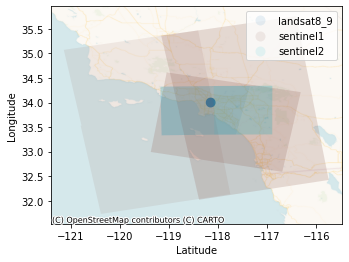

In [7]:
fig,ax = plt.subplots()
la_df.plot(column='label',ax=ax, legend=True)
df.plot(column='sensor',ax=ax,alpha = 0.1,legend=True)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
cx.add_basemap(ax=ax,crs='EPSG:4326',source=cx.providers.CartoDB.VoyagerNoLabels)

Text(66.86925211406276, 0.5, 'Longitude')

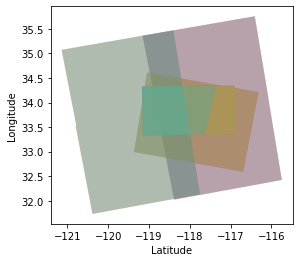

In [18]:
fig,ax = plt.subplots()
df.plot(column='startTime',ax=ax,alpha = 0.25,categorical=True)
# la_df.plot(column='label',ax=ax, legend=True)
plt.xlabel('Latitude')
plt.ylabel('Longitude')